<a href="https://colab.research.google.com/github/Antoha2024/DiplomProductStar/blob/main/DS47_1_diabetes_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- train test split 70/30, stratified
- Random state  - 654321
- Метрика - F1 Macro
- Метрики на train и test не должны сильно отличаться

Гипотеза: Уровень глюкозы в крови оказывает влияние на вероятность заболевания диабетом.
Гипотеза нулевая (H0): Нет разницы в среднем значении уровня глюкозы у пациентов с диабетом и без диабета.
Альтернативная гипотеза (HА​): Существует значительная разница в среднем уровне глюкозы у пациентов с диабетом и без диабета.
Методы проверки: t-тест, сравнение дисперсий.
- Работы команды:
https://colab.research.google.com/drive/1JbX1YjDkzM0qKy7I5EC4jHoqy75E5rAY?usp=sharing - Imbalanced-learn

In [9]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
uploaded = files.upload()
df = pd.read_excel('diabetes_ds.xlsx')
#Переименование таргета, удаление в нём пропусков
df = df.rename(columns={r'Сахарный диабет (ЕСТЬ\НЕТ)' : 'Сахарный диабет'})
df = df.dropna(subset = ['Сахарный диабет']).reset_index(drop=True)
display(df.head(3), df.shape)

Saving diabetes_ds.xlsx to diabetes_ds.xlsx


,Номер,Перенес/ не перенес КВИ,Возраст,Пол,"Рост, см","Вес, кг",ИМТ 2 (ФОРМУЛА EXCEL),Эритроциты,Гемоглобин,Цветовой показатель,...,ИБС. ПИКС,ИБС. ПИКС (ЕСТЬ\НЕТ),"АГ, стадия",АГ (ЕСТЬ\НЕТ),"АГ, степень","АГ, риск","ХСН, стадии","ХСН, ФК","ХСН по фракции выброса, %",Сахарный диабет
0,390.0,1.0,68.0,2.0,158.0,86.0,34.449607,5.33,163.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,2.0,0,1.0
1,337.0,1.0,54.0,1.0,180.0,119.0,36.728395,5.01,130.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,3.0,35,1.0
2,160.0,1.0,68.0,1.0,174.0,110.0,36.332409,NaN,161.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,35,1.0


(478, 108)

In [4]:
df.info() #общая статистика

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 108 entries, Номер to Сахарный диабет
dtypes: float64(101), object(7)
memory usage: 403.4+ KB


In [5]:
#Показать список столбцов полностью
print(df.columns.tolist())

['Номер', 'Перенес/ не перенес КВИ', 'Возраст', 'Пол', 'Рост, см', 'Вес, кг', 'ИМТ 2 (ФОРМУЛА EXCEL)', 'Эритроциты', 'Гемоглобин', 'Цветовой показатель', 'Лейкоциты', 'Лимфоциты% ', 'ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФОРМУЛЕ)', 'Тромбоциты', 'СОЭ', 'Холестерин', 'ЛПНП', 'ЛПВП', 'Индекс атерогенности 2 (формула excel)', 'Глюкоза', 'Гликированный гемоглобин', 'СРБ', 'Ферритин', 'Прокальцитонин', 'Альбумин', 'Лактат', 'ЛДГ', 'АЛТ', 'АСТ', 'Общий билирубин', 'Натрийуретический пептид', 'Мочевина', 'Креатинин, мкмоль/л', 'СКФ CKD-EPI (расчет по общей формуле)', 'Натрий', 'Калий', 'АЧТВ', 'МНО', 'Фибриноген', 'D-димер', 'Фавипиравир', 'Молнупиравир', 'Гидрохлортиазид', 'Фуросемид', 'Торасемид', 'Спиронолактон', 'Валсартан', 'Телмисартан', 'Лозартан', 'Кандесартан', 'Изосорбида динитрат', 'Периндоприл', 'Рамиприл', 'Эналаприл', 'Лизиноприл', 'Бисопролол', 'Карведилол', 'Атенолол', 'Верапамил', 'Дилтиазем', 'Леркамен', 'Амлодипин', 'Дигоксин', 'Ивабрадин', 'Гиполипидемические препараты (статины)', 'Ан

In [6]:
#Столбцы которые содержат пробелы
has_space = df.applymap(lambda x: isinstance(x, str) and ' ' in x).any()
space_columns = has_space[has_space].index
print(space_columns)

Index(['Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)',
       'Блокада НП Гисса (комментарий)', 'ХБП (исходн)'],
      dtype='object')


In [7]:
#Столбцы с типом object
obj_columns = df.columns[df.dtypes == 'object']
print(obj_columns)

Index(['BPB голеней',
       'Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)',
       'Блокада НП Гисса', 'Блокада НП Гисса (комментарий)', 'AV- блокада',
       'ХБП (исходн)', 'ХСН по фракции выброса, %'],
      dtype='object')


Пустых значений: 0
Сахарный диабет
1.0    255
0.0    223
Name: count, dtype: int64


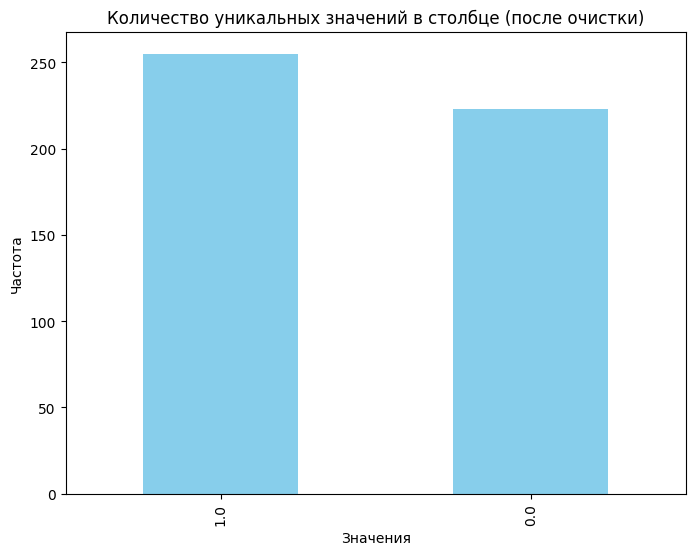

In [8]:
# Подсчет уникальных значений
value_counts = df['Сахарный диабет'].value_counts(dropna=False)

# Подсчет пустых значений
missing_count = df['Сахарный диабет'].isnull().sum()
print(f"Пустых значений: {missing_count}")

# Удаление строк с пустыми значениями
df_cleaned = df.dropna(subset=['Сахарный диабет'])

# Визуализация оставшихся данных
clean_value_counts = df_cleaned['Сахарный диабет'].value_counts()

# Печать очищенных данных
print(clean_value_counts)

# Построение графика
plt.figure(figsize=(8, 6))
clean_value_counts.plot(kind='bar', color='skyblue')
plt.title('Количество уникальных значений в столбце (после очистки)')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

Вывод: Оценивая представленную информацию, можно сказать, что в наборе данных наблюдается умеренный дисбаланс классов:

Класс 1.0 («есть сахарный диабет») присутствует в количестве 255 случаев.
Класс 0.0 («нет сахарного диабета») составляет 223 случая.
Соотношение классов составляет примерно:

$$\frac{223}{255} \approx 1.14$$

То есть класс 1.0 представлен немного чаще, но дисбаланс невелик. Такой уровень дисбаланса считается приемлемым и не требует специальных мер по восстановлению равновесия классов.

In [11]:
print(df.dtypes)

Номер                        float64
Перенес/ не перенес КВИ      float64
Возраст                      float64
Пол                          float64
Рост, см                     float64
                              ...   
АГ, риск                     float64
ХСН, стадии                  float64
ХСН, ФК                      float64
ХСН по фракции выброса, %     object
Сахарный диабет              float64
Length: 108, dtype: object
